In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

In [7]:
pt = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [3]:
pt.head()

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


In [8]:
corr2 = pt.corr()

<AxesSubplot:>

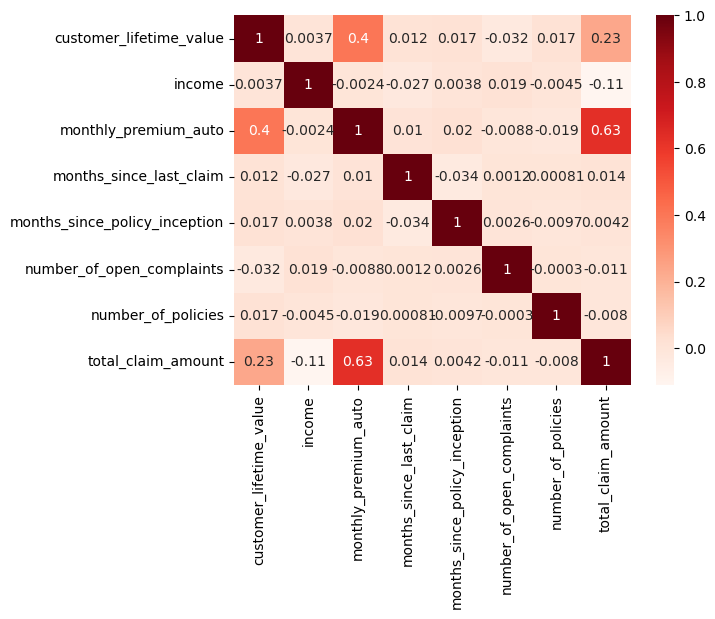

In [5]:
sns.heatmap(corr, cmap="Reds", xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [17]:
pt.drop("total_claim_amount", axis = 1, inplace=True)

KeyError: "['total_claim_amount'] not found in axis"

In [20]:
corr2 = pt.corr()

<AxesSubplot:>

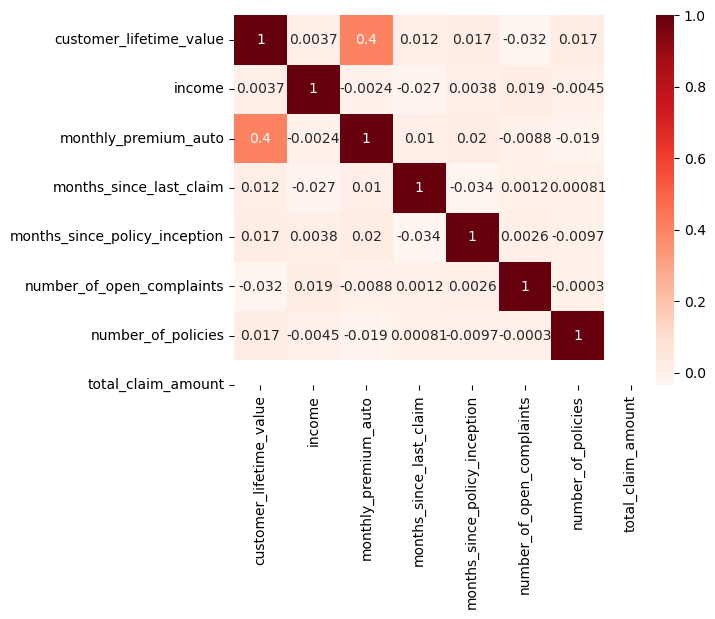

In [21]:
sns.heatmap(corr2, cmap="Reds", xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [22]:
#We
cat_data = pt.select_dtypes(include=['object']).columns
cat_data = pt[cat_data]
cat_data

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [23]:
#We 
num_data = pt.select_dtypes(include=['int', 'float']).columns
num_data = pt[num_data]
num_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


In [27]:
pt.drop("effective_to_date", axis = 1, inplace=True)

KeyError: "['effective_to_date'] not found in axis"

In [30]:
cat_data

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [40]:
#new_df = old_df[['col1','col2']].copy()

ord_pt = cat_data[["coverage","education","month","employment_status","renew_offer_type","vehicle_size"]].copy()

In [42]:
nom_pt = cat_data[["region","response","month","gender","location_code","marital_status","policy_type","policy","sales_channel","vehicle_class"]].copy()

In [45]:
nom_pt = pd.get_dummies(nom_pt, drop_first=True)

In [46]:
nom_pt

,region_east,region_north west,region_west region,response_yes,month_jan,gender_m,location_code_suburban,location_code_urban,marital_status_married,marital_status_single,...,policy_special l2,policy_special l3,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,1,1,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
10685,0,1,0,0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
10686,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
10687,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [47]:
ord_pt

,coverage,education,month,employment_status,renew_offer_type,vehicle_size
0,basic,college,feb,employed,offer3,medsize
1,basic,college,jan,unemployed,offer4,medsize
2,basic,bachelor,feb,employed,offer3,medsize
3,extended,college,jan,employed,offer2,medsize
4,premium,bachelor,jan,medical leave,offer1,medsize
...,...,...,...,...,...,...
10684,premium,bachelor,jan,unemployed,offer3,medsize
10685,basic,college,jan,employed,offer2,medsize
10686,extended,bachelor,feb,employed,offer1,medsize
10687,premium,college,feb,employed,offer1,medsize


In [48]:
# Encoding above ordinal data using OrdinalEncoder

import sklearn.preprocessing
from sklearn.preprocessing import OrdinalEncoder
ordinalencoder = OrdinalEncoder()
ordinalencoder.fit_transform(ord_pt[['coverage']])

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [2.],
       [0.]])

In [52]:
pt['coverage'].unique()


array(['basic', 'extended', 'premium'], dtype=object)

In [55]:
cov_map = {'basic':0, 'extended':1, 'premium':2}
ord_pt['coverage_num'] = ord_pt['coverage'].map(cov_map)

In [57]:
pt['education'].unique()

array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [58]:
edu_map ={'high school or below':0, 'college':1, 'bachelor':2, 'master':3, 'doctor':4}
ord_pt['education_num'] = ord_pt['education'].map(edu_map)

In [60]:
pt['month'].unique()
mon_map ={'jan':0, 'feb':1}
ord_pt['month_num'] = ord_pt['month'].map(mon_map)

In [62]:
pt['employment_status'].unique()
emp_map ={'retired':0, 'disabled':1, 'unemployed':2, 'medical leave':3, 'employed':4}
ord_pt['emp_num'] = ord_pt['employment_status'].map(emp_map)

In [64]:
pt['renew_offer_type'].unique()
ren_map ={'offer1':0, 'offer2':1, 'offer3':2, 'offer4':3}
ord_pt['ren_num'] = ord_pt['renew_offer_type'].map(ren_map)

In [66]:
pt['vehicle_size'].unique()
veh_map ={'small':0, 'medsize':1, 'large':2, 'offer4':3}
ord_pt['veh_num'] = ord_pt['vehicle_size'].map(veh_map)

In [67]:
ord_pt

,coverage,education,month,employment_status,renew_offer_type,vehicle_size,coverage_num,education_num,month_num,emp_num,ren_num,veh_num
0,basic,college,feb,employed,offer3,medsize,0,1,1,4,2,1
1,basic,college,jan,unemployed,offer4,medsize,0,1,0,2,3,1
2,basic,bachelor,feb,employed,offer3,medsize,0,2,1,4,2,1
3,extended,college,jan,employed,offer2,medsize,1,1,0,4,1,1
4,premium,bachelor,jan,medical leave,offer1,medsize,2,2,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10684,premium,bachelor,jan,unemployed,offer3,medsize,2,2,0,2,2,1
10685,basic,college,jan,employed,offer2,medsize,0,1,0,4,1,1
10686,extended,bachelor,feb,employed,offer1,medsize,1,2,1,4,0,1
10687,premium,college,feb,employed,offer1,medsize,2,1,1,4,0,1


In [70]:
num_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


(Optional Task) by Peter Zimmerman
1. varA


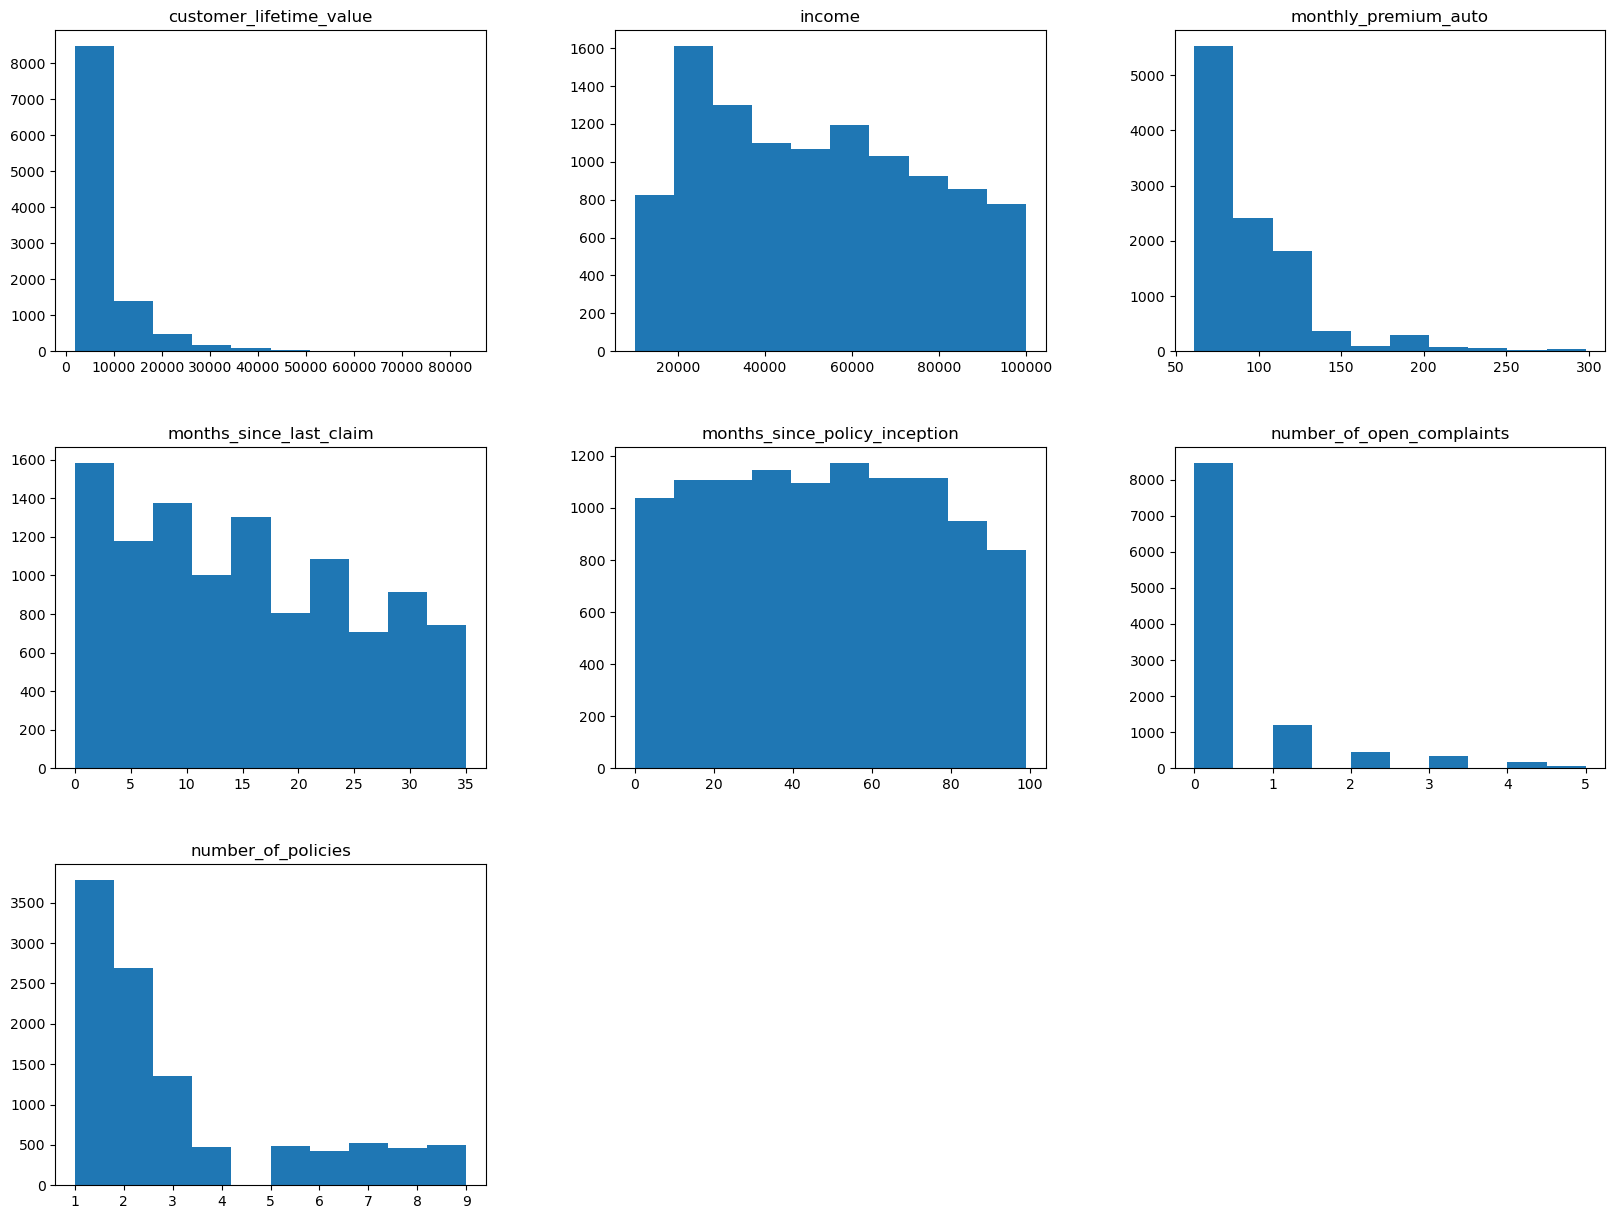

In [74]:
num_data.hist(figsize=(20,15), grid=False)
plt.show()

In [76]:
varA = num_data["income"]
var

0        48029
1        92260
2        22139
3        49078
4        23675
         ...  
10684    61541
10685    61146
10686    39837
10687    64195
10688    68942
Name: income, Length: 10689, dtype: int64

In [80]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler(varA)


MinMaxScaler(feature_range=0        48029
1        92260
2        22139
3        49078
4        23675
         ...  
10684    61541
10685    61146
10686    39837
10687    64195
10688    68942
Name: income, Length: 10689, dtype: int64)